# Exercises

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
import numpy as np
%matplotlib inline

olympicsdata = pd.read_csv('Data/athletes.csv')

olympicsdata.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

## 1. What was the average age in male and female athletes?

In [51]:
from datetime import datetime, timedelta
olympicsdata['dob'] = pd.to_datetime(olympicsdata['dob'])
olympicsdata['age'] = (datetime.today() - olympicsdata['dob'])/timedelta(365)
pd.pivot_table(olympicsdata,
    values= 'age',
    columns=['sex'])

sex
female    26.625928
male      27.258496
Name: age, dtype: float64

## 2. What are the most common Dates of Birth?

In [3]:
olympicsdata['dob'].value_counts()

1988-03-05    9
1990-12-20    9
1993-02-18    9
1988-04-03    8
1991-06-19    8
1989-12-14    8
1993-07-30    8
1990-05-02    8
1993-03-03    8
1989-03-01    8
1988-04-29    8
1989-06-09    8
1990-03-14    7
1994-10-25    7
1994-08-19    7
1991-08-18    7
1991-02-08    7
1991-04-16    7
1990-07-11    7
1993-03-29    7
1988-03-22    7
1988-06-05    7
1988-02-22    7
1988-08-08    7
1993-05-11    7
1991-01-28    7
1992-01-10    7
1994-03-07    7
1989-01-04    7
1988-07-21    7
             ..
1986-07-25    1
1978-07-28    1
1997-05-23    1
1984-05-02    1
1996-04-19    1
1982-05-10    1
1987-09-02    1
1995-07-16    1
1994-08-09    1
1995-09-04    1
1996-08-21    1
1998-03-03    1
1992-09-03    1
1997-08-05    1
1993-07-21    1
1984-08-14    1
1987-03-02    1
1997-03-27    1
1981-04-02    1
1991-11-10    1
2063-11-20    1
1982-08-07    1
1987-06-24    1
1994-09-04    1
1992-05-23    1
1980-12-22    1
1988-02-09    1
1982-02-18    1
1986-08-14    1
1973-06-05    1
Name: dob, dtype: int64

## 3. How about the most common birthdays?

In [4]:
import time
olympicsdata['mnth_day'] = olympicsdata['dob'].apply(
    lambda x: x.strftime('%b-%d') if not pd.isnull(x) else '')
olympicsdata['mnth_day'].value_counts()

Jan-01    58
Feb-05    51
Feb-10    48
Jan-10    47
Sep-19    47
Jan-20    47
Apr-05    46
Mar-05    45
Mar-08    44
Apr-29    44
Jan-13    44
Apr-30    44
May-02    43
Jul-12    43
Feb-14    43
Sep-30    43
May-26    42
Sep-18    42
Mar-11    42
Jan-07    42
May-15    42
Jul-17    41
Sep-29    41
Feb-01    41
Aug-03    41
Mar-29    41
Mar-12    41
Dec-14    40
Jul-16    40
Nov-20    40
          ..
Dec-25    23
Jan-22    22
Dec-22    22
Oct-03    22
Jul-29    22
Jul-14    22
Oct-31    22
Nov-06    22
Aug-12    22
Nov-01    22
Oct-19    22
Jan-14    22
Jun-18    22
Apr-06    21
Dec-16    21
May-13    21
Dec-23    21
Dec-07    21
Dec-26    21
Mar-31    20
Dec-04    20
Feb-11    20
Nov-27    18
Aug-14    18
Aug-28    17
Oct-13    17
Sep-03    16
Oct-29    12
Feb-29     5
           1
Name: mnth_day, dtype: int64

## 4. What are the Countries with more than 100 medals?

In [5]:
medalsdata = pd.melt(olympicsdata, id_vars = 'nationality'
                 ,value_vars = ['gold','silver','bronze'],
                 value_name='totalmedals',
                 var_name='medal')
totalmedals = medalsdata.groupby('nationality')['totalmedals'].sum().reset_index()
totalmedals.sort_values(by='nationality',ascending=False)
topcountries = totalmedals[totalmedals['totalmedals']>100]
topcountries

,nationality,totalmedals
38,CHN,113
68,GBR,145
72,GER,160
159,RUS,115
198,USA,264


## 5. Create a bar or pie chart for the results of the previous exercise.

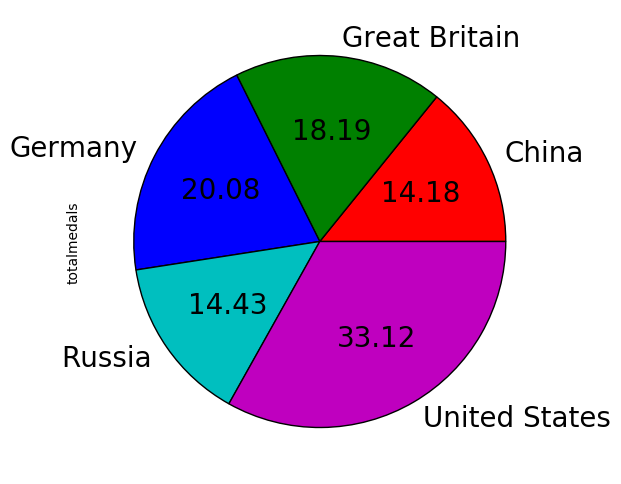

In [6]:
topcountries['totalmedals'].plot.pie(labels=['China', 'Great Britain', 'Germany', 'Russia','United States'],
                                     colors=['r', 'g', 'b', 'c','m'],
                                     autopct='%.2f', fontsize=20, figsize=(6, 6))

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

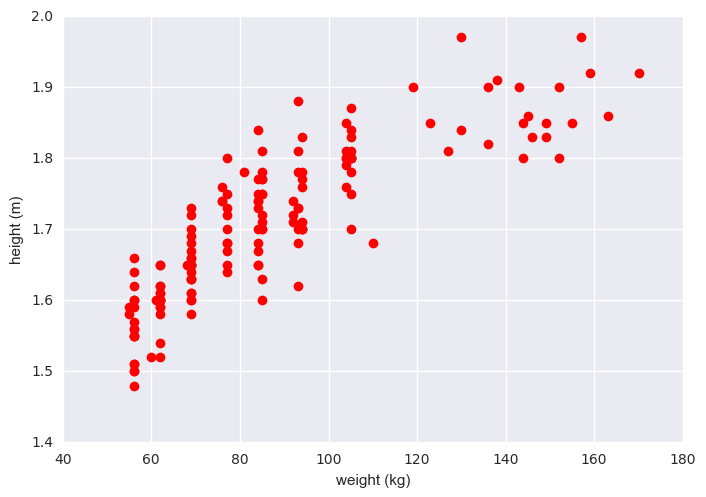

In [8]:
malelifters = olympicsdata[(olympicsdata['sex']=='male')
                           & (olympicsdata['sport']=='weightlifting')]

weight = malelifters['weight']
height = malelifters['height']

plt.plot(weight,height, 'ro')
plt.xlabel("weight (kg)")
plt.ylabel("height (m)")

plt.savefig('weighlifters.png')
plt.show()

## 7. Generate a histogram of male and female height distribution among all participants.

<function matplotlib.pyplot.show>

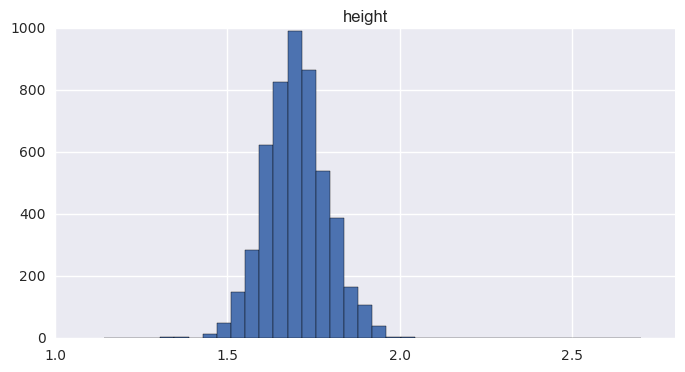

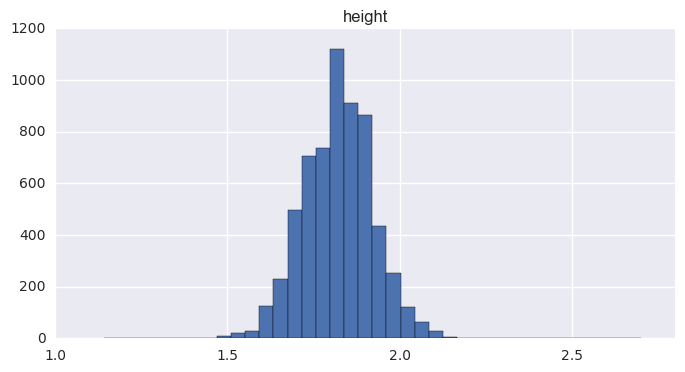

In [38]:
heights = olympicsdata[['sex','height']].dropna()
females = heights[(heights['sex']=='female')]
males = heights[(heights['sex']=='male')]

bins = np.linspace(1.1,2.7,40)


ax = females.hist(bins=bins, figsize = (8,4))
ax = males.hist(bins=bins, figsize=(8,4))
plt.show

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

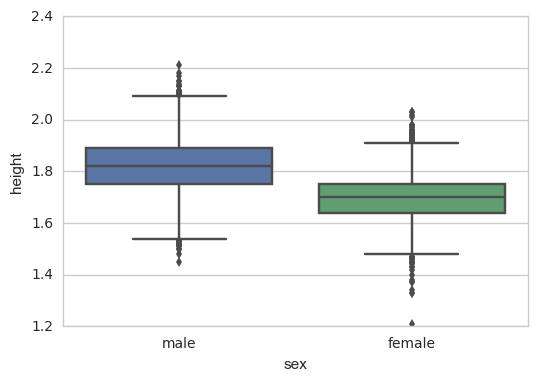

In [39]:
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.boxplot(x='sex',y='height',data=heights)

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

In [44]:
countrydata = pd.read_csv('Data/countries.csv')
countrydata.columns = ['country','nationality']
countrydata.head()



,country,nationality
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [45]:
countrieswithmedals = totalmedals[totalmedals['totalmedals']>0]
countrieswithmedals = countrieswithmedals.merge(countrydata,how='left',on='nationality')
countrieswithmedals.head()

,nationality,totalmedals,country
0,ALG,2,Algeria
1,ARG,22,Argentina
2,ARM,4,Armenia
3,AUS,82,Australia
4,AUT,2,Austria


In [46]:
countrieswithmedals.to_csv('medals.csv')

https://kevinchowder.carto.com/builder/23d05596-02f8-11e7-b5b5-0e3a376473ab/embed

## 10. _Optional_: What else would you try?

In [55]:
pd.pivot_table(olympicsdata,
               aggfunc=np.median,
               values= 'age',
               columns=['sport'])

sport
aquatics             24.019148
archery              25.494490
athletics            26.925997
badminton            27.623257
basketball           28.219148
boxing               25.682161
canoe                27.805449
cycling              27.668463
equestrian           34.156134
fencing              28.212298
football             23.635586
golf                 29.619148
gymnastics           22.531476
handball             28.361613
hockey               27.098600
judo                 26.762983
modern pentathlon    26.224627
rowing               27.575312
rugby sevens         27.013668
sailing              27.865723
shooting             30.401339
table tennis         27.735586
taekwondo            24.764353
tennis               28.971202
triathlon            28.442435
volleyball           28.205449
weightlifting        25.341065
wrestling            27.312298
Name: age, dtype: float64

col_0,age
row_0,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1
